# Student Performance Indicator

## Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis(EDA)
- Data Pre-Processing
- Model Training
- Choose best model

## 1. Problem Statement

- This project understands how the student performance(test scores) is affected by other variables such as Gender, Parental level of education, Ethnicity, Lunch and Test preparation course.

## 2. Data Collection

+ Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
+ The data consists of 8 columns and 1000 rows

### 2.1. Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To Display the plot(render) plots in jupyter notebook itself not in external window.
%matplotlib inline 
import warnings # To manage warning messages, filter out, ignore, or catch specific warnings to make our code output cleaner and more readable.
warnings.filterwarnings('ignore')

In [3]:
# Import CSV Data as Pandas Datarame
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
# Show Top 5 Records(Rows)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Shape of DataFrame
df.shape

(1000, 8)

In [6]:
# DataSet Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Describe Data.
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Checking Number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# More Explore
print(f"Gender: {df['gender'].unique()}")
print(f"Race/Ethnicity: {df['race/ethnicity'].unique()}")
print(f"Parental Level of Education: {df['parental level of education'].unique()}")
print(f"Lunch: {df['lunch'].unique()}")
print(f"Test Preparation Course: {df['test preparation course'].unique()}")

Gender: ['female' 'male']
Race/Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Parental Level of Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch: ['standard' 'free/reduced']
Test Preparation Course: ['none' 'completed']


In [22]:
# More Analysis
math_full = df[df['math score'] == 100]['math score'].count()
reading_full = df[df['reading score'] == 100]['reading score'].count()
writing_full = df[df['writing score'] == 100]['writing score'].count()

print(f"Centum in Math: {math_full}")
print(f"Centum in Reading: {reading_full}")
print(f"Centum in Writing: {writing_full}")

Centum in Math: 7
Centum in Reading: 17
Centum in Writing: 14


## 3. Data Preprocessing

### 3.1. Check Missing Values

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in data set

## 3.2. Check Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates

### 3.3. Define Numerical & Categorical Columns

In [12]:
num_features = [f for f in df.columns if df[f].dtype != 'O']
cat_features = [f for f in df.columns if df[f].dtype == 'O'] # Datatype == Object

# Print num and categorical features.
print(f"Numaric Features: {num_features}")
print(f"Categorial Features: {cat_features}")

Numaric Features: ['math score', 'reading score', 'writing score']
Categorial Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8. Adding columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = round(df['total score'] / 3, 2)

In [16]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


## 4. Exploring Data (Visualization)

### 4.1. Visualizing average score distribution to make some conclusion.

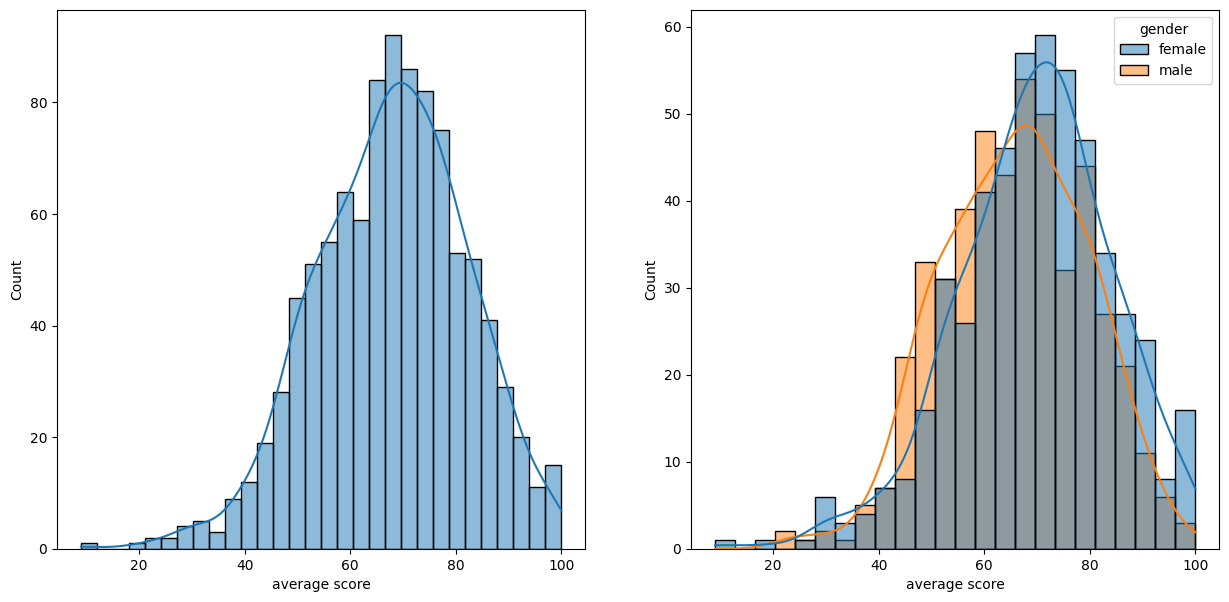

In [41]:
# Histogram and Kernel Distribution Function(KDE)
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', bins = 30, kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'average score', hue='gender', kde = True)
plt.show()

#### Female students are tend to perform well than male students.

<Axes: xlabel='average score', ylabel='Count'>

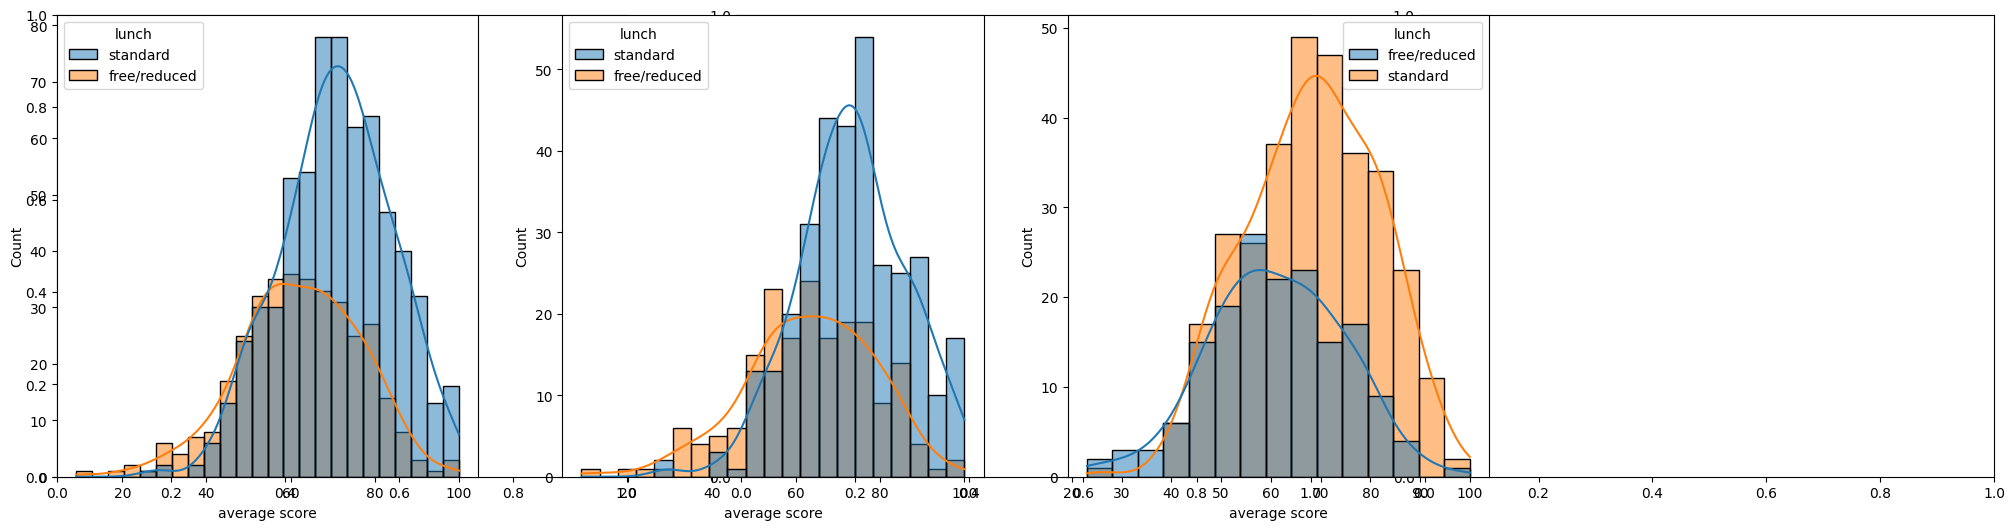

In [60]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average score', hue = 'lunch', kde = True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')


#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps well in exams be it 

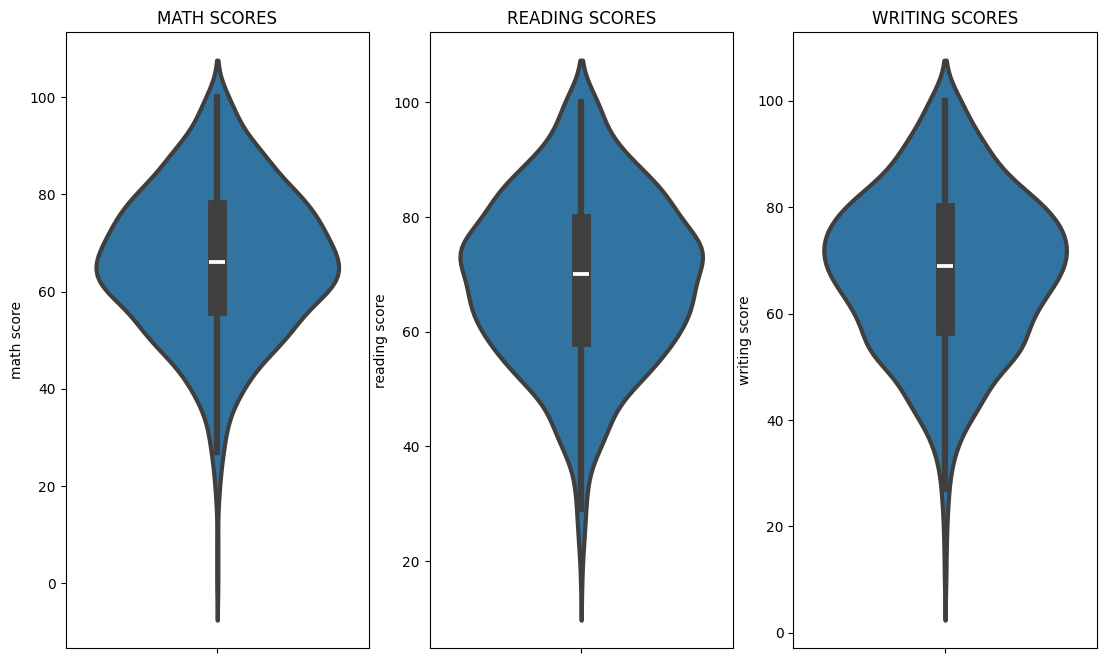

In [51]:
# Maximum Score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,linewidth=3)
plt.show()

#### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Conclusion
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course